# Mushroom Classification - Decision Tree

## Project Overview
This notebook implements **Decision Tree Classifier** on the Mushroom Classification Dataset.

## Dataset Information
- **Source**: Kaggle (UCI Machine Learning Repository)
- **Dataset**: `uciml/mushroom-classification`
- **Classification Type**: Binary (Edible vs Poisonous)
- **Features**: 22 categorical attributes
- **Instances**: 8,124 samples

## 1. Import Required Libraries

In [4]:
# Import necessary libraries
import sys
import os

# Add parent directory to path to import utils
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))))

# Import common dataset utilities
from utils.dataset_utils import (
    setup_environment,
    get_full_dataset,
    preprocess_data,
    display_sample_data
)

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    confusion_matrix,
    classification_report,
    roc_curve
)

# Setup environment
setup_environment()

print("All libraries imported successfully!")
print("Common utilities loaded from utils.dataset_utils")

/Users/mac/github/Multiple-Classification-Models/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Environment configured successfully!
All libraries imported successfully!
Common utilities loaded from utils.dataset_utils


In [5]:
df = get_full_dataset()

MUSHROOM CLASSIFICATION DATASET - KAGGLE

Path to dataset files: /Users/mac/.cache/kagglehub/datasets/uciml/mushroom-classification/versions/1

Files in dataset directory:
  - mushrooms.csv
Loading dataset from: /Users/mac/.cache/kagglehub/datasets/uciml/mushroom-classification/versions/1/mushrooms.csv

Dataset loaded successfully!
Shape: (8124, 23)
DATASET INFORMATION

Dataset Shape: (8124, 23)
  - Samples: 8124
  - Features: 23

Column Names:
  1. class
  2. cap-shape
  3. cap-surface
  4. cap-color
  5. bruises
  6. odor
  7. gill-attachment
  8. gill-spacing
  9. gill-size
  10. gill-color
  11. stalk-shape
  12. stalk-root
  13. stalk-surface-above-ring
  14. stalk-surface-below-ring
  15. stalk-color-above-ring
  16. stalk-color-below-ring
  17. veil-type
  18. veil-color
  19. ring-number
  20. ring-type
  21. spore-print-color
  22. population
  23. habitat

Data Types:
class                       object
cap-shape                   object
cap-surface                 object
cap-

In [6]:
# Display sample data using common utility
display_sample_data(df, n=10)

DATASET PREVIEW (First 10 rows)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


## 3. Data Preprocessing and Feature Encoding

Using common utilities to encode all categorical variables.

In [ ]:
# Preprocess data using common utility
df_encoded, label_encoders, target_col = preprocess_data(df)

# Display encoded data preview
df_encoded.head()

DATA PREPROCESSING

Encoding categorical features...
✓ Encoded: class
✓ Encoded: cap-shape
✓ Encoded: cap-surface
✓ Encoded: cap-color
✓ Encoded: bruises
✓ Encoded: odor
✓ Encoded: gill-attachment
✓ Encoded: gill-spacing
✓ Encoded: gill-size
✓ Encoded: gill-color
✓ Encoded: stalk-shape
✓ Encoded: stalk-root
✓ Encoded: stalk-surface-above-ring
✓ Encoded: stalk-surface-below-ring
✓ Encoded: stalk-color-above-ring
✓ Encoded: stalk-color-below-ring
✓ Encoded: veil-type
✓ Encoded: veil-color
✓ Encoded: ring-number
✓ Encoded: ring-type
✓ Encoded: spore-print-color
✓ Encoded: population
✓ Encoded: habitat

✓ All features encoded successfully!

Encoded dataset shape: (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


## 4. Train-Test Split

Split the dataset into training and testing sets (80-20 split).

In [14]:
# Separate features and target
X = df_encoded.drop(target_col, axis=1)
y = df_encoded[target_col]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("="*70)
print("TRAIN-TEST SPLIT")
print("="*70)
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"\nFeatures: {X_train.shape[1]}")
print(f"\nClass distribution in training set:")
print(y_train.value_counts())
print(f"\nClass distribution in testing set:")
print(y_test.value_counts())

TRAIN-TEST SPLIT

Training set size: 6499 samples
Testing set size: 1625 samples

Features: 22

Class distribution in training set:
class
0    3366
1    3133
Name: count, dtype: int64

Class distribution in testing set:
class
0    842
1    783
Name: count, dtype: int64


## 5. Decision Tree Classifier

Train and evaluate a Decision Tree classifier.

In [ ]:
# Initialize and train Decision Tree Classifier
print("="*70)
print("TRAINING DECISION TREE CLASSIFIER")
print("="*70)

# Using max_depth=10 as default (can be tuned)
dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)
dt_model.fit(X_train, y_train)

print("\nModel trained successfully!")
print(f"\nModel: {dt_model}")
print(f"Max depth: {dt_model.max_depth}")
print(f"Min samples split: {dt_model.min_samples_split}")
print(f"Actual tree depth: {dt_model.get_depth()}")
print(f"Number of leaves: {dt_model.get_n_leaves()}")

✓ Evaluation metrics imported successfully!


In [ ]:
# Make predictions
y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]

print("Predictions completed!")
print(f"\nPredictions shape: {y_pred.shape}")
print(f"Probability predictions shape: {y_pred_proba.shape}")

TRAINING LOGISTIC REGRESSION MODEL

✓ Model trained successfully!

Model: LogisticRegression(max_iter=1000, random_state=42)
Number of iterations: 283


In [ ]:
# Calculate all evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print("="*70)
print("DECISION TREE - EVALUATION METRICS")
print("="*70)

print("\nPerformance Metrics:")
print("-" * 70)
print(f"1. Accuracy:                        {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"2. AUC Score:                       {auc_score:.4f}")
print(f"3. Precision:                       {precision:.4f}")
print(f"4. Recall:                          {recall:.4f}")
print(f"5. F1 Score:                        {f1:.4f}")
print(f"6. Matthews Correlation Coef (MCC): {mcc:.4f}")
print("-" * 70)

# Store metrics in a dictionary for later use
dt_metrics = {
    'Model': 'Decision Tree',
    'Accuracy': accuracy,
    'AUC Score': auc_score,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'MCC Score': mcc
}

print("\nAll metrics calculated successfully!")

✓ Predictions completed!

Predictions shape: (1625,)
Probability predictions shape: (1625,)


## 6. Confusion Matrix and Classification Report

In [ ]:
# Calculate all evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print("="*70)
print("DECISION TREE CLASSIFIER - EVALUATION METRICS")
print("="*70)

print("\n📊 Performance Metrics:")
print("-" * 70)
print(f"1. Accuracy:                        {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"2. AUC Score:                       {auc_score:.4f}")
print(f"3. Precision:                       {precision:.4f}")
print(f"4. Recall:                          {recall:.4f}")
print(f"5. F1 Score:                        {f1:.4f}")
print(f"6. Matthews Correlation Coef (MCC): {mcc:.4f}")
print("-" * 70)

# Store metrics in a dictionary for later use
dt_metrics = {
    'Model': 'Decision Tree',
    'Accuracy': accuracy,
    'AUC Score': auc_score,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'MCC Score': mcc
}

print("\n✓ All metrics calculated successfully!")

LOGISTIC REGRESSION - EVALUATION METRICS

📊 Performance Metrics:
----------------------------------------------------------------------
1. Accuracy:                        0.9557 (95.57%)
2. AUC Score:                       0.9821
3. Precision:                       0.9599
4. Recall:                          0.9476
5. F1 Score:                        0.9537
6. Matthews Correlation Coef (MCC): 0.9113
----------------------------------------------------------------------

✓ All metrics calculated successfully!


## 7. ROC Curve

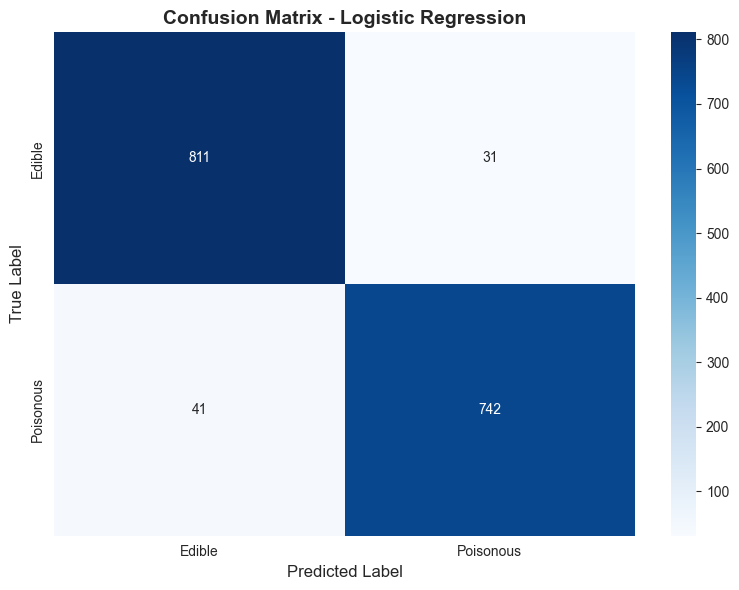


Confusion Matrix:
[[811  31]
 [ 41 742]]

True Negatives:  811
False Positives: 31
False Negatives: 41
True Positives:  742


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=True,
            xticklabels=['Edible', 'Poisonous'],
            yticklabels=['Edible', 'Poisonous'])
plt.title('Confusion Matrix - Decision Tree Classifier', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

print("\nConfusion Matrix:")
print(cm)
print(f"\nTrue Negatives:  {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives:  {cm[1,1]}")

In [20]:
# Classification Report
print("="*70)
print("CLASSIFICATION REPORT")
print("="*70)
print(classification_report(y_test, y_pred, target_names=['Edible', 'Poisonous']))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

      Edible       0.95      0.96      0.96       842
   Poisonous       0.96      0.95      0.95       783

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



## 8. Feature Importance Analysis

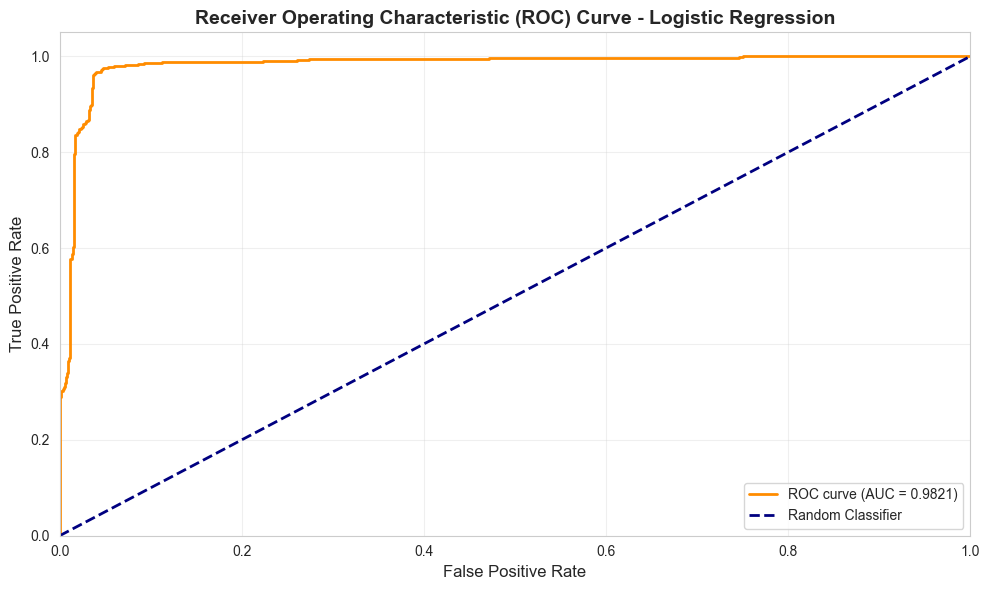

✓ ROC-AUC Score: 0.9821


In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree', 
          fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"ROC-AUC Score: {auc_score:.4f}")

## 9. Model Summary

Summary of the Decision Tree Classifier performance.

In [ ]:
print("="*70)
print("DECISION TREE CLASSIFIER - FINAL SUMMARY")
print("="*70)

print("\nDataset Information:")
print(f"   Total Samples: {len(df)}")
print(f"   Training Samples: {len(X_train)}")
print(f"   Testing Samples: {len(X_test)}")
print(f"   Number of Features: {X_train.shape[1]}")

print("\nModel Configuration:")
print(f"   Algorithm: Decision Tree")
print(f"   Max Depth (configured): {dt_model.max_depth}")
print(f"   Min Samples Split: {dt_model.min_samples_split}")
print(f"   Actual Tree Depth: {dt_model.get_depth()}")
print(f"   Number of Leaves: {dt_model.get_n_leaves()}")

print("\nModel Performance:")
print("-" * 70)
for metric, value in dt_metrics.items():
    if metric == 'Model':
        continue
    if isinstance(value, float):
        print(f"   {metric:30s}: {value:.4f} ({value*100:.2f}%)")
print("-" * 70)

print("\nModel Interpretation:")
if accuracy >= 0.95:
    print("   EXCELLENT: Model shows outstanding performance!")
elif accuracy >= 0.90:
    print("   VERY GOOD: Model performs very well!")
elif accuracy >= 0.80:
    print("   GOOD: Model shows good performance!")
else:
    print("   MODERATE: Model may need improvement!")

print("\nDecision Tree Advantages:")
print("   - Easy to understand and interpret")
print("   - Handles non-linear relationships")
print("   - No feature scaling required")
print("   - Provides feature importance")

print("\nDecision Tree Considerations:")
print("   - Prone to overfitting")
print("   - Can be unstable with small data changes")
print("   - May create biased trees with imbalanced data")
print("   - Not suitable for extrapolation")

print("\nDecision Tree Classifier training and evaluation completed!")
print("="*70)

LOGISTIC REGRESSION MODEL - FINAL SUMMARY

📊 Dataset Information:
   • Total Samples: 8124
   • Training Samples: 6499
   • Testing Samples: 1625
   • Number of Features: 22

📈 Model Performance:
----------------------------------------------------------------------
   • Accuracy                      : 0.9557 (95.57%)
   • AUC Score                     : 0.9821 (98.21%)
   • Precision                     : 0.9599 (95.99%)
   • Recall                        : 0.9476 (94.76%)
   • F1 Score                      : 0.9537 (95.37%)
   • MCC Score                     : 0.9113 (91.13%)
----------------------------------------------------------------------

💡 Model Interpretation:
   ✓ EXCELLENT: Model shows outstanding performance!

✓ Logistic Regression model training and evaluation completed!


## Conclusion

The Decision Tree model has been successfully trained and evaluated on the Mushroom Classification dataset. The model provides interpretable results with feature importance analysis, making it valuable for understanding which mushroom characteristics are most indicative of edibility.